### Zadanie VI: Grupowanie danych

W tym zadaniu skoncentrujemy się na analizie klasycznego zbioru danych dotyczącego irysów (gatunek kwiatów). 

#### Wprowadzenie zbioru

Zbiór *Iris Dataset* to popularny zbiór szkoleniowy zawierający informacje o różnych gatunkach irysów oraz ich cechach morfologicznych.

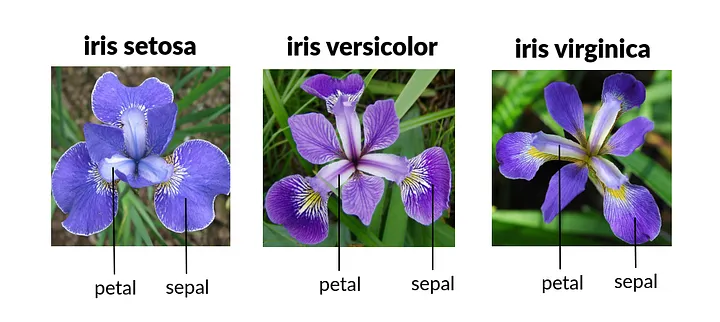

W zbiorze znajdują się pomiary (szerokość i wysokość) dwóch płatków (**petal** czyli płatek i **sepal** czyli działka) oraz informacja o tym jakiego gatunku dotyczy pojedynczy pomiar (**viriginica**, **versicolor**, **setosa**).

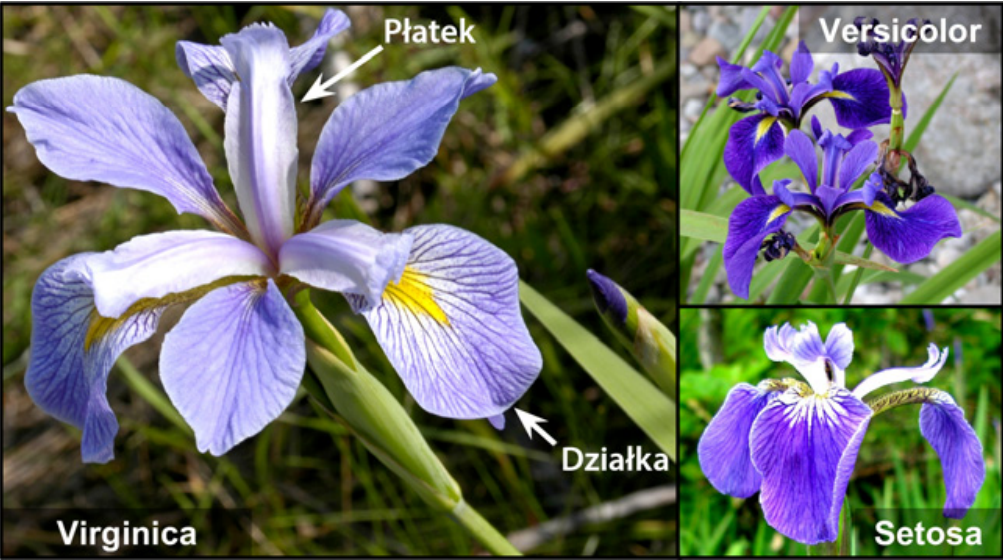

Zbiór jest dostępny m.in. pod adresem: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Uwaga! Zbiór zawiera wyłącznie pomiary. Nie działamy na obrazach.

Celem zadania jest przećwiczenie korzystania z metod `groupby` oraz funkcji agregujących i odkrywanie za ich pomocą interesujących informacji w danych.

**1. Wczytanie danych**

Wczytaj zbiór danych z url (csv) i zapoznaj się z nim. Zbiór nie posiada nagłówków, więc należy samodzielnie dodać nagłówki za pomocą parametru `names` metody `pd.read_csv`.

In [2]:
import pandas as pd

# Wczytaj dane
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(
    url,
    names=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"],
)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Sprawdzenie struktury danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Różnica pomiędzy grupowaniem z reset_index i bez.

In [5]:
df.groupby("species")['sepal_width'].mean()

species
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: sepal_width, dtype: float64

In [ ]:
...

**2. Podstawowa agregacja**

Zgrupuj dane według gatunku (species) i oblicz średnie wartości dla cech sepal_length, sepal_width, petal_length oraz petal_width.

In [6]:
# Zgrupuj dane według gatunku i oblicz średnie wartości
print("Średnie wartości cech dla każdego gatunku:")
mean_values = df.groupby("species").mean()
mean_values

Średnie wartości cech dla każdego gatunku:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


**3. Zliczanie obserwacji**

Zgrupuj dane według gatunku i policz liczbę obserwacji dla każdego gatunku.

In [7]:
# Zgrupuj dane według gatunku i policz liczbę obserwacji
# size - wszystkie wartości, count - wartości not null
print("\nLiczba obserwacji dla każdego gatunku:")
df.groupby("species").count()


Liczba obserwacji dla każdego gatunku:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [8]:
df.groupby("species").size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**4. Agregacja z zastosowaniem wielu funkcji**

Zgrupuj dane według gatunku i oblicz zarówno średnią, jak i maksymalną wartość dla petal_length.

In [9]:
# Zgrupuj dane według gatunku i oblicz średnią oraz maksymalną wartość dla petal_length
print("\nŚrednia i maksymalna wartość petal_length dla każdego gatunku:")
df.groupby("species")["petal_length"].agg(["mean", "max"])


Średnia i maksymalna wartość petal_length dla każdego gatunku:


,mean,max
species,,
Iris-setosa,1.464,1.9
Iris-versicolor,4.260,5.1
Iris-virginica,5.552,6.9


**5. Filtracja wyników**

Zgrupuj dane według gatunku i oblicz średnią wartość dla sepal_width, a następnie wyświetl tylko te gatunki, dla których średnia jest większa niż 3.0.

In [11]:
# Zgrupuj dane według gatunku i oblicz średnią wartość dla sepal_width

# Filtruj tylko te gatunki, dla których średnia jest większa niż 3.0
df.groupby('species')['sepal_width'].mean() > 3


Gatunki z średnią sepal_width większą niż 3.0:


species
Iris-setosa         True
Iris-versicolor    False
Iris-virginica     False
Name: sepal_width, dtype: bool

In [17]:
print("\nGatunki z średnią sepal_width większą niż 3.0:")
mean_sepal_width = df.groupby("species")["sepal_width"].mean()
mean_sepal_width[mean_sepal_width > 3.0]


Gatunki z średnią sepal_width większą niż 3.0:


species
Iris-setosa    3.418
Name: sepal_width, dtype: float64